In [46]:
import pandas as pd

users = pd.read_csv("resources/data/user_dataset.csv")

In [47]:
users.head(5)

,user_no,user_id,user_gender,user_age,buy_count,cheese_rank,cheese_code,cheese_id,cheese_brand,cheese_name,cheese_texture,cheese_types,cheese_category,cheese_one_price,gender,age_group,cheese_category_code,cheese_texture_code,brand,brand_code
0,0,2391853,M,40,1,8.0,8,p8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,"4,600원",0,3,3,1,프란시아,15
1,1,1799897,F,40,1,8.0,8,p8,프란시아,리코타 치즈,후레쉬치즈,자연치즈,리코타,"4,600원",1,3,3,1,프란시아,15
2,2,1614947,F,50,1,10.0,10,p10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"5,500원",1,4,1,1,푸글리제,30
3,3,1614947,F,50,1,10.0,10,p10,푸글리제,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"5,500원",1,4,1,1,푸글리제,30
4,4,1614947,F,50,5,14.0,15,p14,콜롬보,모짜렐라,후레쉬치즈,자연치즈,모짜렐라,"4,900원",1,4,1,1,콜롬보,28


In [25]:
user_X_train_set = user_X_train.drop('user_id', axis = 1)
user_X_train_set['cheese_one_price'] = user_X_train_set['cheese_one_price'].str.replace(',', '')
user_X_train_set['cheese_one_price'] = user_X_train_set['cheese_one_price'].str.replace('원', '')

user_X_trian_set = user_X_train_set.astype({'cheese_one_price': int})

In [26]:
user_X_train_set.head(5)

,user_no,user_gender,user_age,buy_count,cheese_rank,cheese_code,cheese_id,cheese_brand,cheese_name,cheese_texture,cheese_types,cheese_category,cheese_one_price,gender,age_group,cheese_category_code,cheese_texture_code,brand,brand_code
0,3312,F,30,2,2.0,2,p2,프란시아,모짜렐라 카우,후레쉬치즈,자연치즈,모짜렐라,3870,1,2,1,1,프란시아,15
1,21971,F,30,2,2.0,2,p2,프란시아,모짜렐라 카우,후레쉬치즈,자연치즈,모짜렐라,3870,1,2,1,1,프란시아,15
2,2347,F,50,1,15.0,16,p15,콜롬보,리코타,후레쉬치즈,자연치즈,리코타,6860,1,4,3,1,콜롬보,28
3,18459,M,40,3,2.0,2,p2,프란시아,모짜렐라 카우,후레쉬치즈,자연치즈,모짜렐라,3870,0,3,1,1,프란시아,15
4,8768,F,40,1,17.0,18,p17,프란시아,모짜렐라 부팔라,후레쉬치즈,자연치즈,모짜렐라,6240,1,3,1,1,프란시아,15


## 히스토그램

<AxesSubplot:xlabel='brand_code'>

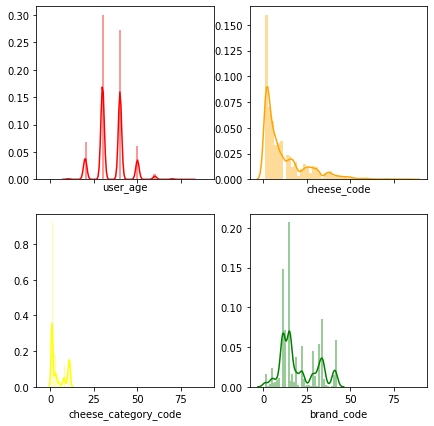

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 2, figsize=(7,7), sharex=True)
sns.distplot(user_data["user_age"], color="red", ax=axes[0,0])
sns.distplot(user_data["cheese_code"], color="orange", ax=axes[0,1])
sns.distplot(user_data["cheese_category_code"], color = "yellow", ax=axes[1,0])
sns.distplot(user_data["brand_code"], color = "green", ax=axes[1,1])
# sns.distplot(user_data["cheese_texture_code"], color="blue", ax=axes[0,2])
# sns.distplot(user_data["cheese_one_price"], color = "purple", ax=axes[1,2])

<AxesSubplot:xlabel='brand_code'>

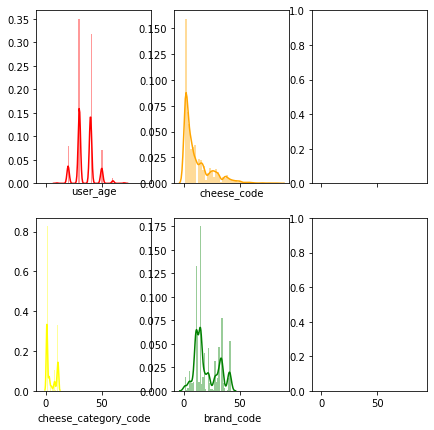

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(2, 3, figsize=(7,7), sharex=True)
sns.distplot(user_X_train_set["user_age"], color="red", ax=axes[0,0])
sns.distplot(user_X_train_set["cheese_code"], color="orange", ax=axes[0,1])
sns.distplot(user_X_train_set["cheese_category_code"], color = "yellow", ax=axes[1,0])
sns.distplot(user_X_train_set["brand_code"], color = "green", ax=axes[1,1])
# sns.distplot(user_X_train_set["cheese_texture_code"], color="blue", ax=axes[0,2])
# sns.distplot(user_X_train_set["cheese_one_price"], color = "purple", ax=axes[1,2])

## 데이터 변환

<AxesSubplot:xlabel='log_cheese_code'>

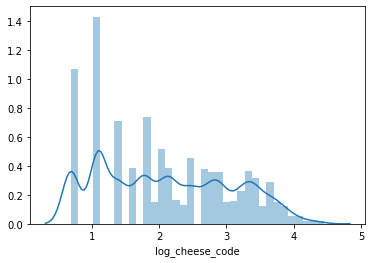

In [41]:
import numpy as np

user_data['log_cheese_code'] = np.log1p(user_data['cheese_code'])

# f, ax = plt.subplots(1, 2, figsize = (10, 6),  sharex=True)

# sns.distplot(user_data['cheese_code'], ax=axes[0,0])
# sns.distplot(user_data['log_cheese_code'], ax=axes[0,1])

# sns.distplot(user_data['cheese_code'])
sns.distplot(user_data['log_cheese_code'])

In [ ]:
X = users[['buy_count', 'cheese_rank', 'gender', 'age_group', 'cheese_texture_code', 'brand_code']]
y = users[['cheese_category_code']]

In [ ]:
cheese_code 	cheese_id 	cheese_brand 	cheese_name 	cheese_texture 	cheese_types 	cheese_category 	cheese_one_price 	gender 	age_group 	cheese_category_code 	cheese_texture_code 	brand 	brand_code

In [43]:
import scipy.stats as ss

user_std = ss.zscore(user_data)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [8]:
user_data['cheese_category_code'].corr(user_data['age_group'])

-0.02096866938420734

In [42]:
user_data.corr()

,user_no,user_age,buy_count,cheese_rank,cheese_code,cheese_one_price,gender,age_group,cheese_category_code,cheese_texture_code,brand_code,log_cheese_code
user_no,1.000000,-0.032045,0.008431,-0.148777,-0.139952,0.024084,-0.035222,-0.034016,-0.029954,-0.091239,-0.030963,-0.188058
user_age,-0.032045,1.000000,-0.017203,0.099169,0.095910,-0.047238,-0.076134,0.996809,-0.020996,0.056015,0.067683,0.127017
buy_count,0.008431,-0.017203,1.000000,-0.064746,-0.064391,0.046095,-0.015247,-0.017938,0.070986,0.008240,-0.004112,-0.076049
cheese_rank,-0.148777,0.099169,-0.064746,1.000000,0.998469,0.102626,0.002438,0.100243,-0.057113,0.369683,0.037686,0.919500
cheese_code,-0.139952,0.095910,-0.064391,0.998469,1.000000,0.118614,0.001445,0.096890,-0.055273,0.367250,0.020526,0.902780
cheese_one_price,0.024084,-0.047238,0.046095,0.102626,0.118614,1.000000,0.024350,-0.048107,0.474594,-0.150871,-0.165896,-0.044316
gender,-0.035222,-0.076134,-0.015247,0.002438,0.001445,0.024350,1.000000,-0.074365,0.039268,0.024483,0.013762,0.011219
age_group,-0.034016,0.996809,-0.017938,0.100243,0.096890,-0.048107,-0.074365,1.000000,-0.020969,0.057719,0.069226,0.128802
cheese_category_code,-0.029954,-0.020996,0.070986,-0.057113,-0.055273,0.474594,0.039268,-0.020969,1.000000,0.302787,0.151134,-0.127686
cheese_texture_code,-0.091239,0.056015,0.008240,0.369683,0.367250,-0.150871,0.024483,0.057719,0.302787,1.000000,0.310784,0.353814
